# Selecionando pontos dentro de uma região

In [1]:
import geopandas as gpd

# Carregando os dados

In [3]:
rj = gpd.read_file('../01.Dados/Mapas/RJ-MINUC/RJ-MINUC.shp')
geo_dados = gpd.read_file('../01.Dados/Mapas/RJ-DATASET/DATASET.shp')

## Verificando os crs das bases de dados

In [4]:
rj.crs

<Projected CRS: PROJCS["Transverse_Mercator",GEOGCS["GCS_unknown", ...>
Name: Transverse_Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [5]:
geo_dados.crs

<Projected CRS: PROJCS["Transverse_Mercator",GEOGCS["GCS_unknown", ...>
Name: Transverse_Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## Plotagem dos mapas

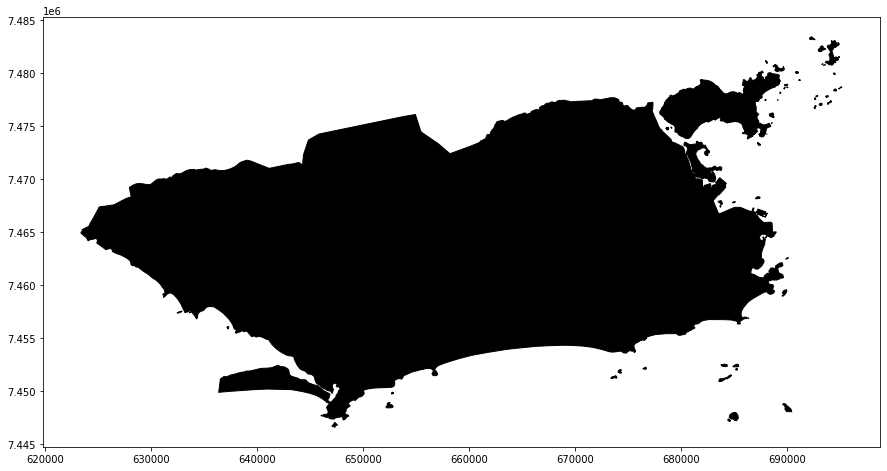

In [7]:
rj.plot(color='black',edgecolor='black',figsize=(15,8))

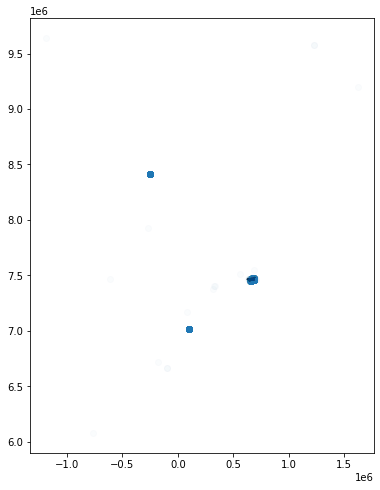

In [25]:
base = rj.plot(color='black',edgecolor='black',figsize=(10,8))
geo_dados.plot(ax=base,figsize=(15,8),alpha=0.02)

Veja que há outros imóveis rotulados no município do Rio de Janeiro, mas não são. Obeseve uma pequena mancha preta no maior ponto azul, é o municipio do Rio de Janeiro.

# Armazenado os imoveis apenas na cidade do rio de janeiro

In [26]:
rj.iloc[0]

ID                                                         1535
CD_GEOCODM                                              3304557
NM_MUNICIP                                       RIO DE JANEIRO
geometry      (POLYGON ((692575.8012880638 7476609.203982484...
Name: 0, dtype: object

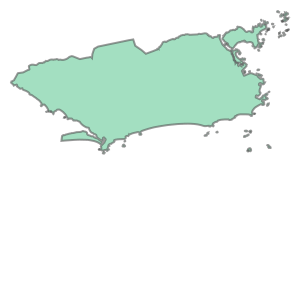

In [28]:
rj.iloc[0].geometry

In [30]:
geo_dados.iloc[0]

Area                                                 138
Bairro                          Recreio dos Bandeirantes
Cidade                                    Rio de Janeiro
Endereco                             Rua Vicente Scofano
Estado                                                RJ
Latitude                                        -23.0165
Longitude                                       -43.4629
Quartos                                                3
Suites                                                 1
Vagas                                                  3
Tipo                                         Apartamento
Transacao                                          Venda
Valor                                            1095000
geometry     POINT (657513.7068691058 7453832.425203198)
Name: 0, dtype: object

In [31]:
geo_dados.iloc[0].geometry.within(rj.iloc[0].geometry)

True

In [32]:
rj.iloc[0].geometry.contains(geo_dados.iloc[0].geometry)

True

In [35]:
geo_dados['geometry'].within(rj.iloc[0].geometry)

0        True
1        True
2        True
3        True
4       False
        ...  
4995     True
4996     True
4997     True
4998     True
4999     True
Length: 5000, dtype: bool

In [36]:
geo_dados

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657513.707 7453832.425)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670523.903 7461803.088)
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674345.004 7469439.743)
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662701.378 7457284.071)
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000,POINT (-248714.677 8415116.901)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000,POINT (648663.999 7469215.800)
4996,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000,POINT (655009.667 7452943.597)
4997,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000,POINT (683909.380 7459847.754)
4998,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000,POINT (678393.129 7464417.213)


In [37]:
amostra = geo_dados.iloc[:12]
amostra

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657513.707 7453832.425)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670523.903 7461803.088)
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674345.004 7469439.743)
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662701.378 7457284.071)
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000,POINT (-248714.677 8415116.901)
5,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656018.715 7453574.299)
6,74,Tijuca,Rio de Janeiro,Rua Amoroso Costa,RJ,-22.933575,-43.247109,3,2,1,Apartamento,Venda,595000,POINT (679746.417 7462761.815)
7,200,Copacabana,Rio de Janeiro,Rua Souza Lima,RJ,-22.982300,-43.192534,4,1,1,Apartamento,Venda,2100000,POINT (685277.527 7457298.273)
8,119,Barra da Tijuca,Rio de Janeiro,Península Fit,RJ,-14.235004,-51.925280,3,2,2,Apartamento,Venda,1130000,POINT (-248714.677 8415116.901)
9,88,Flamengo,Rio de Janeiro,Rua Senador Vergueiro,RJ,-22.936402,-43.175411,2,2,1,Apartamento,Venda,1450000,POINT (687096.323 7462359.225)


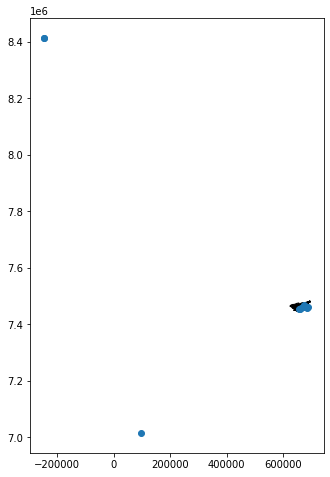

In [39]:
base = rj.plot(color='black',edgecolor='black',figsize=(10,8))
amostra.plot(ax=base,figsize=(15,8),alpha=1)

In [40]:
antes = geo_dados.shape[0]
antes

5000

In [41]:
geo_dados = geo_dados[geo_dados['geometry'].within(rj.iloc[0].geometry)]
geo_dados.shape

(4513, 14)

In [43]:
geo_dados.shape[0] - antes

-487

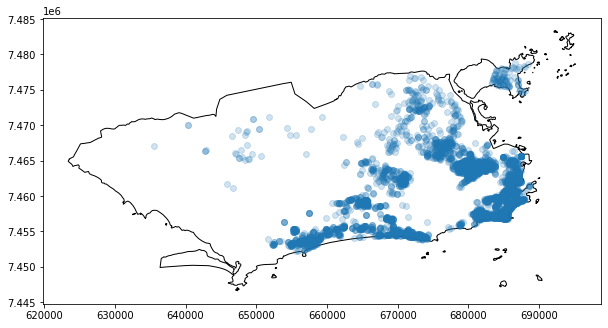

In [49]:
base = rj.plot(color='white',edgecolor='black',figsize=(10,8))
geo_dados.plot(ax=base,figsize=(15,8),alpha=0.2)

### Salvando o arquivo e as outras extensões necessárias

In [50]:
geo_dados.to_file('../01.Dados/Mapas/RJ-DATASET/DATASET.shp',enconding='UTF-8')